NotMINST Classification
=============

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [76]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -u -n -t -z
%watermark -p numpy,sklearn,matplotlib
%watermark -m

Vutsal Singhal
last updated: Wed Jun 28 2017 13:47:20 IST
numpy 1.13.0
sklearn 0.18.2
matplotlib 2.0.2
compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.8.0-56-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [74]:
# Import libraries
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from six.moves import cPickle as pickle
%matplotlib inline

num_classes = 10
np.random.seed(133)

## Displaying few images from the dataset

Training data: 
A


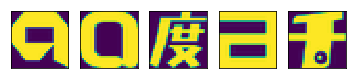

B


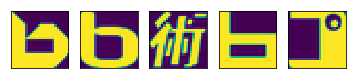

C


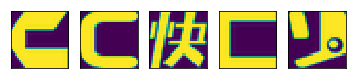

D


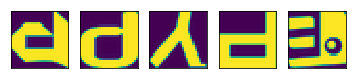

E


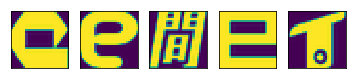

F


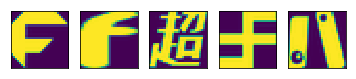

G


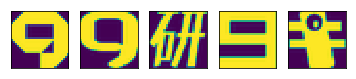

H


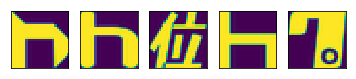

I


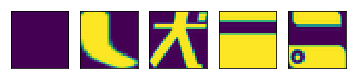

J


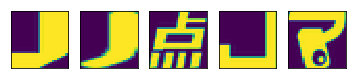

Validation data: 
A


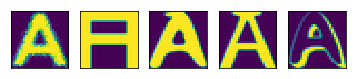

B


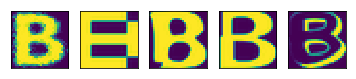

C


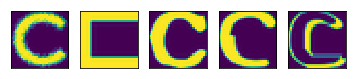

D


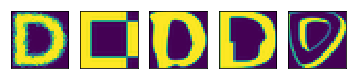

E


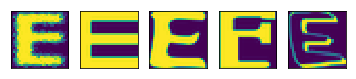

F


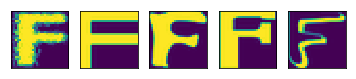

G


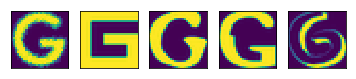

H


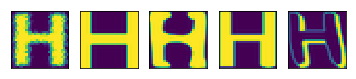

I


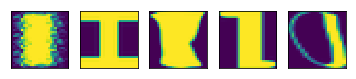

J


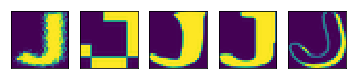

In [77]:
from matplotlib.image import imread
training_path = '../../DATASETS/notMNIST/notMNIST_large/'
testing_path  = '../../DATASETS/notMNIST/notMNIST_small/'
training_dirs = os.listdir(training_path)
testing_dirs  = os.listdir(testing_path)

print("Training data: ")
for letter in training_dirs:
    files_path = os.path.join(training_path, letter)
    if os.path.isdir(files_path):
        files      = os.listdir(files_path)
        print(letter)
        for i in range(5):
            plt.subplot(150+1+i)
            plt.imshow(imread(files_path+'/'+files[i], format='png'))
            plt.tick_params(which='both',bottom='off',top='off',right='off',left='off',labelleft='off', labelbottom='off')
        plt.show()

print("Validation data: ")
for letter in testing_dirs:
    files_path = os.path.join(testing_path, letter)
    if os.path.isdir(files_path):
        files      = os.listdir(files_path)
        print(letter)
        for i in range(5):
            plt.subplot(150+1+i)
            plt.imshow(imread(files_path+'/'+files[i], format='png'))
            plt.tick_params(which='both',bottom='off',top='off',right='off',left='off',labelleft='off', labelbottom='off')
        plt.show()

## Converting data into more manageable format
The entire dataset is converted into a 3D array (image_index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. (Some images might not be readable so we'll skip them).

In [40]:
image_size  = 28
pixel_depth = 255.0

def load_letter(folder, min_num_images):
    image_files = os.listdir(folder)
    dataset     = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
        
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %(num_images, min_num_images))
        
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
                
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        if os.path.isdir(folder):
            set_filename = folder + '.pickle'
            dataset_names.append(set_filename)
            if os.path.exists(set_filename) and not force:
                print('%s already present - Pickling aborted!' % set_filename)
            else:
                print('Pickling %s.' % set_filename)
                dataset = load_letter(folder, min_num_images_per_class)
                try:
                    with open(set_filename, 'wb') as f:
                        pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
                except Exception as e:
                    print('Unable to save data to', set_filename, ':', e)
    
    return dataset_names

train_datasets = maybe_pickle([training_path + x for x in training_dirs], 45000)
test_datasets  = maybe_pickle([testing_path + x for x in testing_dirs], 1800)

../../DATASETS/notMNIST/notMNIST_large/A.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/B.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/C.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/D.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/E.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/F.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/G.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/H.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/I.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_large/J.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_small/A.pickle already present - Pickling aborted!
../../DATASETS/notMNIST/notMNIST_small/B.pickle already present - Pickling a

## Verifying the pickeled data
Displaying samples of the labels and images from the ndarray

Training data
File:  A.pickle
Tensor dimension:  (52909, 28, 28)


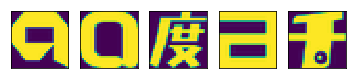

File:  B.pickle
Tensor dimension:  (52911, 28, 28)


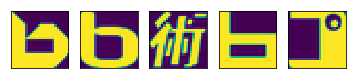

File:  C.pickle
Tensor dimension:  (52912, 28, 28)


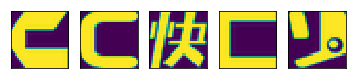

File:  D.pickle
Tensor dimension:  (52911, 28, 28)


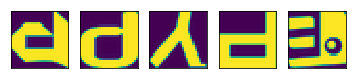

File:  E.pickle
Tensor dimension:  (52912, 28, 28)


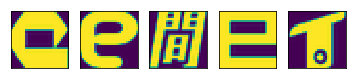

File:  F.pickle
Tensor dimension:  (52912, 28, 28)


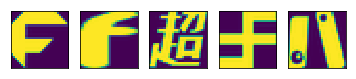

File:  G.pickle
Tensor dimension:  (52912, 28, 28)


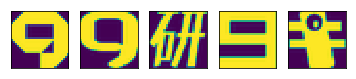

File:  H.pickle
Tensor dimension:  (52912, 28, 28)


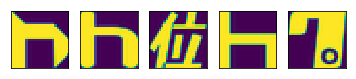

File:  I.pickle
Tensor dimension:  (52912, 28, 28)


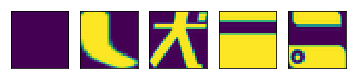

File:  J.pickle
Tensor dimension:  (52911, 28, 28)


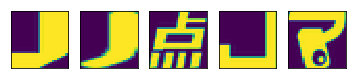

Validation data
File:  A.pickle
Tensor dimension:  (1872, 28, 28)


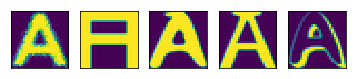

File:  B.pickle
Tensor dimension:  (1873, 28, 28)


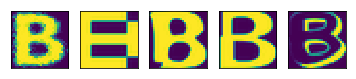

File:  C.pickle
Tensor dimension:  (1873, 28, 28)


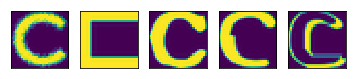

File:  D.pickle
Tensor dimension:  (1873, 28, 28)


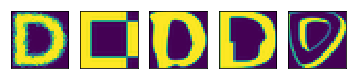

File:  E.pickle
Tensor dimension:  (1873, 28, 28)


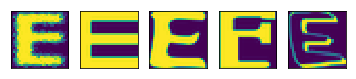

File:  F.pickle
Tensor dimension:  (1872, 28, 28)


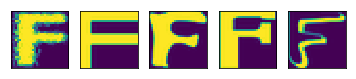

File:  G.pickle
Tensor dimension:  (1872, 28, 28)


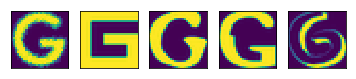

File:  H.pickle
Tensor dimension:  (1872, 28, 28)


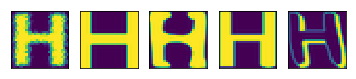

File:  I.pickle
Tensor dimension:  (1872, 28, 28)


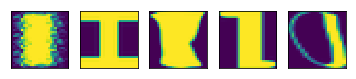

File:  J.pickle
Tensor dimension:  (1872, 28, 28)


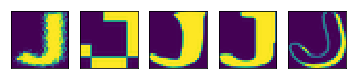

In [6]:
print("Training data")
for p_file in train_datasets:
    file = open(p_file, 'rb')
    disp_var = pickle.load(file)
    print("File: ", p_file.split('/')[-1])
    print("Tensor dimension: ", disp_var.shape)
    for i in range(5):
        plt.subplot(150+1+i)
        plt.imshow(disp_var[i])
        plt.tick_params(which='both',bottom='off',top='off',right='off',left='off',labelleft='off', labelbottom='off')
    plt.show()
        
print("Validation data")
for p_file in test_datasets:
    file = open(p_file, 'rb')
    disp_var = pickle.load(file)
    print("File: ", p_file.split('/')[-1])
    print("Tensor dimension: ", disp_var.shape)
    for i in range(5):
        plt.subplot(150+1+i)
        plt.imshow(disp_var[i])
        plt.tick_params(which='both',bottom='off',top='off',right='off',left='off',labelleft='off', labelbottom='off')
    plt.show()

In [7]:
print('Number of images per class: ')
for letter in train_datasets:
    file = open(letter, 'rb')
    dataset = pickle.load(file)
    print(letter + '   size: ' + str(dataset.shape[0]))
for letter in test_datasets:
    file = open(letter, 'rb')
    dataset = pickle.load(file)
    print(letter + '   size: ' + str(dataset.shape[0]))

Number of images per class: 
../../DATASETS/notMNIST/notMNIST_large/A.pickle   size: 52909
../../DATASETS/notMNIST/notMNIST_large/B.pickle   size: 52911
../../DATASETS/notMNIST/notMNIST_large/C.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/D.pickle   size: 52911
../../DATASETS/notMNIST/notMNIST_large/E.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/F.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/G.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/H.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/I.pickle   size: 52912
../../DATASETS/notMNIST/notMNIST_large/J.pickle   size: 52911
../../DATASETS/notMNIST/notMNIST_small/A.pickle   size: 1872
../../DATASETS/notMNIST/notMNIST_small/B.pickle   size: 1873
../../DATASETS/notMNIST/notMNIST_small/C.pickle   size: 1873
../../DATASETS/notMNIST/notMNIST_small/D.pickle   size: 1873
../../DATASETS/notMNIST/notMNIST_small/E.pickle   size: 1873
../../DATASETS/notMNIST/notMNIST_small/F.pickl

## Merging and pruning training data

Also create a validation dataset for hyperparameter tuning.

In [24]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels  = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes                 = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class             = valid_size // num_classes
    tsize_per_class             = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t     = vsize_per_class, tsize_per_class
    end_l            = vsize_per_class+tsize_per_class
    
    for label, pickle_file in enumerate(pickle_files):       
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                np.random.shuffle(letter_set) # Shuffling to have random validation and training set
                if valid_dataset is not None:
                    valid_dataset[start_v:end_v, :, :] = letter_set[:vsize_per_class, :, :]
                    valid_labels[start_v:end_v]        = label
                    start_v                           += vsize_per_class
                    end_v                             += vsize_per_class

                train_dataset[start_t:end_t, :, :] = letter_set[vsize_per_class:end_l, :, :]
                train_labels[start_t:end_t]        = label
                start_t                            += tsize_per_class
                end_t                              += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size  = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels                          = merge_datasets(test_datasets, test_size)

print('Training: \n\tX size: ', train_dataset.shape, " Y size: ", train_labels.shape)
print('Validation: \n\tX size: ', valid_dataset.shape, " Y size: ", valid_labels.shape)
print('Testing: \n\tX size: ', test_dataset.shape, " Y size: ", test_labels.shape)

Training: 
	X size:  (200000, 28, 28)  Y size:  (200000,)
Validation: 
	X size:  (10000, 28, 28)  Y size:  (10000,)
Testing: 
	X size:  (10000, 28, 28)  Y size:  (10000,)


## Randomizing the data

In [44]:
def randomize(dataset, labels):
    permutation      = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels  = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels   = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

## Verifyiny data

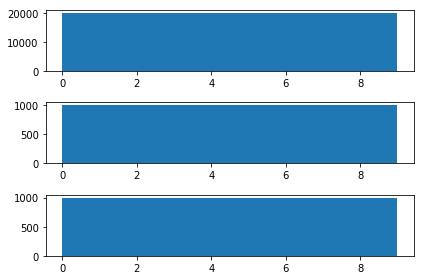

In [45]:
fig, ax = plt.subplots(3, 1)
ax[0].hist(train_labels, 10)
ax[1].hist(test_labels, 10)
ax[2].hist(valid_labels, 10)
fig.tight_layout()

# Saving data:

In [51]:
pickle_file = '../../DATASETS/notMNIST/notMNIST_randomised.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [52]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


## Resolving overlapping
By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set!

- You can also create a sanitized validation and test set and compare accuracy

In [78]:
train_dataset.flags.writeable = False
valid_dataset.flags.writeable = False
test_dataset.flags.writeable  = False

# Hashes are unique representation
train_hash = [hash(e.tobytes()) for e in train_dataset]
valid_hash = [hash(e.tobytes()) for e in valid_dataset]
test_hash  = [hash(e.tobytes()) for e in test_dataset]

# set() removes duplicates
unique_train_hash = set(train_hash)
valid_overlap     = unique_train_hash.intersection(set(valid_hash))
test_overlap      = unique_train_hash.intersection(set(test_hash))

print('Duplicates inside training set: ', len(train_hash) - len(unique_train_hash))
print('Duplicates between training and validation: ', len(valid_overlap))
print('Duplicates between training and test: ', len(test_overlap))

Duplicates inside training set:  12726
Duplicates between training and validation:  891
Duplicates between training and test:  1155


## Training a classifier
Training a simple model on this data using 50, 100, 1000 and 5000 training samples. Now you can also train an off-the-shelf model on all the data!

In [ ]:
from sklearn.linear_model import LogisticRegression

train_sample        = train_dataset[:5000,:,:]
train_sample_labels = train_labels[:5000]

(samples, width, height) = train_sample.shape
train_sample = np.reshape(train_sample, (samples, width * height))

(samples, width, height) = test_dataset.shape
test_dataset_reshaped = np.reshape(test_dataset, (samples, width * height))

model = LogisticRegression(penalty='l2', C=1.0)
model.fit(train_sample, train_sample_labels)

train_score = model.score(train_sample, train_sample_labels)
test_score = model.score(test_dataset_reshaped, test_labels)
print('Training score = ', train_score)
print('Test score = ', test_score)